<div align="center">
<div style='color:blue; font-size:40px; border:1px outset black'>Project Essentials: code
    
    André de Oliveira Gomes
</div>

# Table of contents
[Part 1 - Import and exploration of the data. Initial Visualization Analysis.](#P1) 
- [1.1 Exploring the precipitation in the state of São Paulo.](#P1-1)
- [1.2 Comparing anomalies of temperatures between São Paulo, Rio and Manaus](#P1-2)

[Part 2 - Construction of the final data set for analysis. Visualization.](#P2)


[Part 3 - A failed logistic regression rainfallSP/anomalies.](#P3)

[Part 4 - Modelization for the rainfalls/anomalies temps SP.](#P4)
- [4.1 Initial considerations about the anomalies of temperatures.](#P4-1)
- [4.2 Multilinear regression.](#P4-2)
- [4.3 Logistic regression](#P4-3)

In [1]:
# Import of the libraries that are used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Part 1 - Import and exploration of the data. Initial Visualization Analysis.<a name="P1"></a>

## 1.1 - Exploring the precipitation in the state of São Paulo. <a name='P1-1'></a>

In [2]:
### We start the descriptive analysis of the rainfall data in SP

In [3]:
# Reading the file of the rain in SP
rainfallset = pd.read_csv("rainfalls_SP.csv", index_col=0)
rainfallset.head(100)

,Data,Hora,Precipitacao
Estacao,,,
83781,03/10/1961,1200.0,0.0
83781,04/10/1961,1200.0,0.0
83781,05/10/1961,1200.0,0.0
83781,06/10/1961,1200.0,0.0
83781,07/10/1961,1200.0,0.0
...,...,...,...
83781,06/01/1962,1200.0,0.0
83781,07/01/1962,1200.0,0.0
83781,08/01/1962,1200.0,18.0


Comment1: the data set starts at 1961

In [4]:
rainfallset.tail()

,Data,Hora,Precipitacao
Estacao,,,
83781,30/09/2016,1200.0,0.0
83781,01/10/2016,1200.0,0.0
83781,02/10/2016,1200.0,0.0
83781,03/10/2016,1200.0,0.0
"</pre> <div id=""facebox"" style=""display:none","> <div class=""popup""> <table> ...",NaN,NaN


Comment2: The data of rain fall ends in the month November 2016. The drough of SP was felt between 2014-2017. In São Paulo, it has been described as the worst drought in 100 years by the media. Check the Guardian article mentioned in the deliverable / presentation. 

In [5]:
rainfallset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19788 entries, 83781 to </pre>    <div id="facebox" style="display:none
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Data          19788 non-null  object 
 1   Hora          19787 non-null  float64
 2   Precipitacao  19787 non-null  float64
dtypes: float64(2), object(1)
memory usage: 618.4+ KB


In [6]:
##convert the string concerning column Data into datetime objects
rainfallset["Data"]=pd.to_datetime(rainfallset["Data"], infer_datetime_format=True, errors = 'coerce')

In [7]:
rainfallset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19788 entries, 83781 to </pre>    <div id="facebox" style="display:none
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Data          7801 non-null   datetime64[ns]
 1   Hora          19787 non-null  float64       
 2   Precipitacao  19787 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 618.4+ KB


In [8]:
rainfallset.head()

,Data,Hora,Precipitacao
Estacao,,,
83781,1961-03-10,1200.0,0.0
83781,1961-04-10,1200.0,0.0
83781,1961-05-10,1200.0,0.0
83781,1961-06-10,1200.0,0.0
83781,1961-07-10,1200.0,0.0


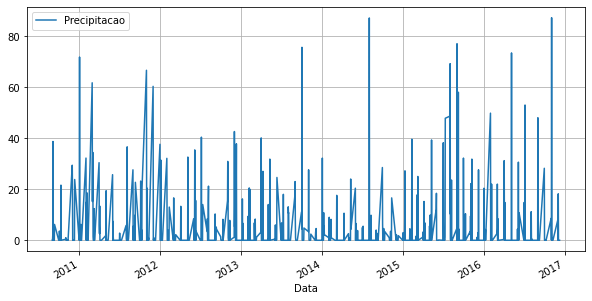

In [9]:
#use masks to focus on specific dates and in particular the drought period 2014-2017
mask= rainfallset["Data"] >= "2010-09-02"
rainfallset[mask].plot.line(x="Data", y="Precipitacao", figsize=(10,5), grid=True)

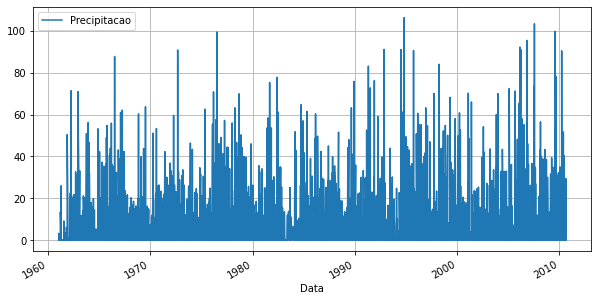

In [10]:
#use masks to focus on specific dates and in particular the drought period 2014-2017
mask2= rainfallset["Data"] <= "2010-09-02"
rainfallset[mask2].plot.line(x="Data", y="Precipitacao", figsize=(10,5), grid=True)

In [11]:
rainfallset.describe(include ='all')

<ipython-input-11-2d0c528f6c65>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  rainfallset.describe(include ='all')


,Data,Hora,Precipitacao
count,7801,19787.0,19787.000000
unique,7801,NaN,NaN
top,1968-11-10 00:00:00,NaN,NaN
freq,1,NaN,NaN
first,1961-01-11 00:00:00,NaN,NaN
last,2016-12-09 00:00:00,NaN,NaN
mean,NaN,1200.0,4.248911
std,NaN,0.0,10.697383
min,NaN,1200.0,0.000000
25%,NaN,1200.0,0.000000


In [12]:
##now separating months and years in the dataframe
rainfallset["year"] = pd.DatetimeIndex(rainfallset["Data"]).year
rainfallset["month"] = pd.DatetimeIndex(rainfallset["Data"]).month

In [13]:
rainfallset.head()

,Data,Hora,Precipitacao,year,month
Estacao,,,,,
83781,1961-03-10,1200.0,0.0,1961.0,3.0
83781,1961-04-10,1200.0,0.0,1961.0,4.0
83781,1961-05-10,1200.0,0.0,1961.0,5.0
83781,1961-06-10,1200.0,0.0,1961.0,6.0
83781,1961-07-10,1200.0,0.0,1961.0,7.0


In [14]:
###We see that we need to create cummulative rain months fall between years in order to have 
##better precision
####this would do by year
###annual_rainfallset=pd.pivot_table(data=rainfallset, index='year', values='Precipitacao', aggfunc='sum')

annual_rainfallset=pd.pivot_table(data=rainfallset, index='year', values='Precipitacao', aggfunc='sum').reset_index().rename(columns={'Precipitacao': 'annual_rainfall'})


In [15]:
annual_rainfallset.describe(include='all')

,year,annual_rainfall
count,56.000000,56.000000
mean,1988.500000,594.369643
std,16.309506,194.823955
min,1961.000000,111.500000
25%,1974.750000,474.825000
50%,1988.500000,579.800000
75%,2002.250000,687.925000
max,2016.000000,1142.500000


In [16]:
annual_rainfallset.head()

,year,annual_rainfall
0,1961.0,144.1
1,1962.0,577.0
2,1963.0,362.7
3,1964.0,418.4
4,1965.0,649.9


In [17]:
annual_rainfallset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             56 non-null     float64
 1   annual_rainfall  56 non-null     float64
dtypes: float64(2)
memory usage: 1.0 KB


In [18]:
annual_rainfallset.columns

Index(['year', 'annual_rainfall'], dtype='object')

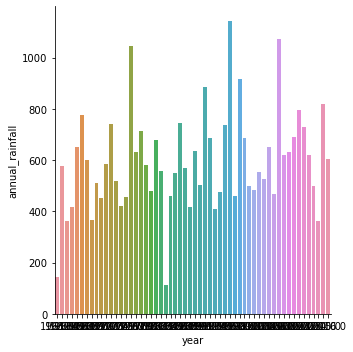

In [19]:
# Visualisation exploratoire 
##histogram with 95% confidence interval
sns.catplot(x="year", y="annual_rainfall", data=annual_rainfallset,kind="bar")

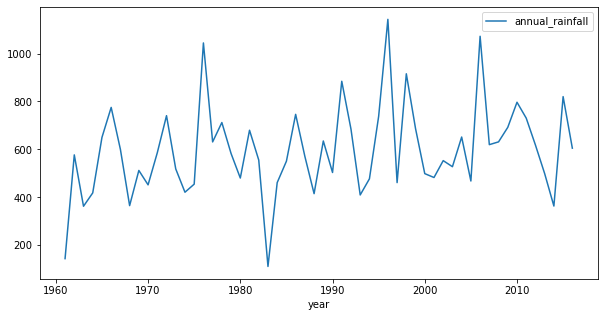

In [20]:
plt=annual_rainfallset.plot.line(x="year", y="annual_rainfall", figsize=(10,5))

Comments: two extremely critical drough periods after the 70s': around 1980 and after 2010. We want to focus on the last period.

around 2010 the level of precipitation went down a lot. So we will try to use logistic regression that will try to predict the probability of the rainfall will go down more than the level of 2010


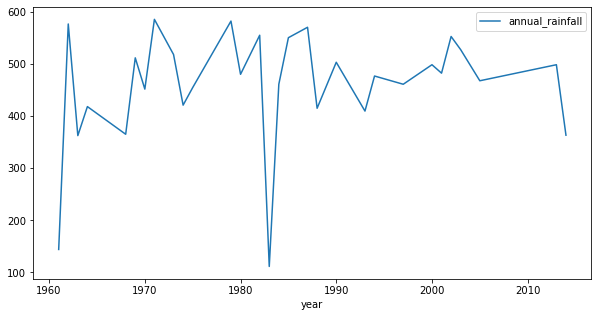

In [21]:
#to have some idea of the critical values below 600
mask=annual_rainfallset["annual_rainfall"] <=600
annual_rainfallset[mask].plot.line(x="year", y="annual_rainfall", figsize=(10,5))

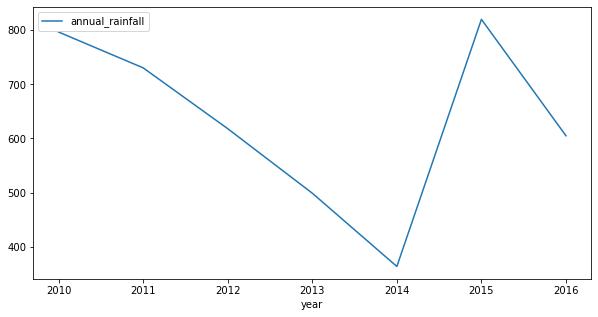

In [22]:
#to have some idea of the critcal values below 600
mask=annual_rainfallset["year"] >=2010
annual_rainfallset[mask].plot.line(x="year", y="annual_rainfall", figsize=(10,5))

Comment: this graph tell us how BAD was 2014!! Year to focus of the drought.  The critical period comes 2011-2014. Why? 2011 the derivative is very steep negative.

How to check the minimum of 2014?

In [23]:
##creation of an auxiliary table for that purpose
mask3 = annual_rainfallset["year"] >= 2010
filtered_data = annual_rainfallset[mask3] 
print (filtered_data)

      year  annual_rainfall
49  2010.0            796.6
50  2011.0            730.4
51  2012.0            618.0
52  2013.0            498.8
53  2014.0            363.5
54  2015.0            820.1
55  2016.0            605.0


Critical minimum: 363.5

So now we want to create a single data frame combining C02Brazil, deflorestation of the states around Brazil and the temperatures SP

In [24]:
critical_minimum=363.5
threshold=498.8
#the threshold is the value of 2013 when things got very bad#

In [25]:
## we want cummulative rain by month of the year in order to compare it with other variables 
##of the other files

month_rainfallset=pd.pivot_table(data=rainfallset, index=['year','month'], values='Precipitacao', aggfunc='sum').reset_index().rename(columns={'Precipitacao': 'total_rainfall'})


In [26]:
month_rainfallset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            672 non-null    float64
 1   month           672 non-null    float64
 2   total_rainfall  672 non-null    float64
dtypes: float64(3)
memory usage: 15.9 KB


In [27]:
month_rainfallset.head()

,year,month,total_rainfall
0,1961.0,1.0,3.2
1,1961.0,2.0,5.7
2,1961.0,3.0,16.8
3,1961.0,4.0,26.8
4,1961.0,5.0,0.0


In [28]:
# in order to have coeherence between the table of the monthrainfall and the temperatures of SP and therefore
##to merge them we need the month to be with same data type.
##first step is to convert the floats into integers
month_rainfallset['month']=month_rainfallset['month'].astype(int)

In [29]:
month_rainfallset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            672 non-null    float64
 1   month           672 non-null    int64  
 2   total_rainfall  672 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 15.9 KB


In [30]:
import calendar
month_rainfallset['month'] = month_rainfallset['month'].apply(lambda x: calendar.month_abbr[x])

In [31]:
month_rainfallset.head()

,year,month,total_rainfall
0,1961.0,Jan,3.2
1,1961.0,Feb,5.7
2,1961.0,Mar,16.8
3,1961.0,Apr,26.8
4,1961.0,May,0.0


In [32]:
month_rainfallset.tail()

,year,month,total_rainfall
667,2016.0,Aug,11.7
668,2016.0,Sep,48.0
669,2016.0,Oct,28.5
670,2016.0,Nov,95.9
671,2016.0,Dec,26.2


In [33]:
month_rainfallset.describe(include ='all')

,year,month,total_rainfall
count,672.00000,672,672.000000
unique,NaN,12,NaN
top,NaN,Apr,NaN
freq,NaN,56,NaN
mean,1988.50000,NaN,49.530804
std,16.17527,NaN,36.090199
min,1961.00000,NaN,0.000000
25%,1974.75000,NaN,23.600000
50%,1988.50000,NaN,42.450000
75%,2002.25000,NaN,67.900000


In [34]:
month_rainfallset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            672 non-null    float64
 1   month           672 non-null    object 
 2   total_rainfall  672 non-null    float64
dtypes: float64(2), object(1)
memory usage: 15.9+ KB


In [35]:
## Are there missing files?
# CLEANING
month_rainfallset.isnull().any()
#No there are not missing values. We wil deal with this later.

year              False
month             False
total_rainfall    False
dtype: bool

For now we would like to see when was the critical period of the drought. We use data visualization for this. Time to aggregate everything!

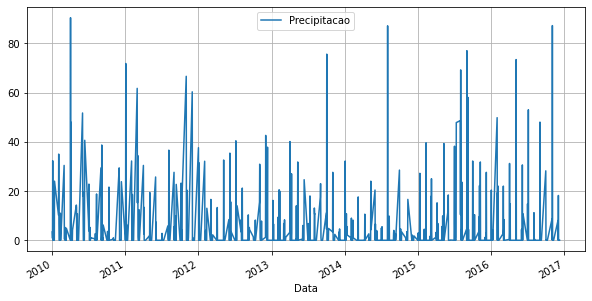

In [36]:
#use masks to focus on specific dates and in particular the drought period 2014-207
mask= rainfallset["Data"] >= "2010-01-01"
rainfallset[mask].plot.line(x="Data", y="Precipitacao", figsize=(10,5), grid=True)

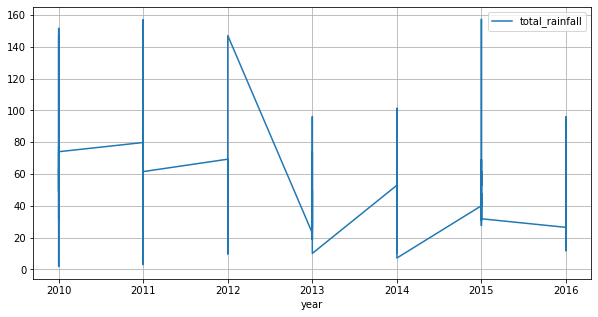

In [37]:
##Focus on the precipitation per month
mask= month_rainfallset["year"] >= 2010
month_rainfallset[mask].plot.line(x="year", y="total_rainfall", figsize=(10,5), grid=True)

In [38]:
##We confirm the critical minimum around 2014 as empirically suffered in SP

Let us now think about the temperatures.
We want to understand if the anomalies of temperatures were high or not in SP in the year of SP when compared with the data set of the rainfall.

## 1.2 - Comparing anomalies of temperatures between São Paulo, Rio and Manaus <a name='P1-2'></a>

In [39]:
###Exploring the data of temperatures in SP
SP_temp = pd.read_csv("sp_temperatures.csv", index_col=0)
SP_temp.head(100)

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN
YEAR,,,,,,,,,,,,,,,,,
1946,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,21.74,999.90,999.90,999.90,999.90,999.90
1947,999.90,23.54,21.04,19.74,19.24,999.90,15.04,16.44,18.04,17.04,18.94,20.34,22.75,20.01,15.67,18.01,19.11
1948,23.64,22.94,20.74,20.04,18.04,16.64,17.84,15.64,18.64,18.74,20.64,21.24,22.31,19.61,16.71,19.34,19.49
1949,22.34,21.54,23.54,19.44,17.24,17.34,16.34,17.34,18.24,18.74,19.74,21.54,21.71,20.07,17.01,18.91,19.42
1950,22.14,22.44,22.24,20.44,19.44,17.94,16.44,19.14,19.54,19.04,19.94,21.94,22.04,20.71,17.84,19.51,20.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,26.35,24.60,23.15,22.00,19.25,18.70,18.60,20.65,21.85,23.00,22.95,24.50,25.17,21.47,19.32,22.60,22.14
2016,23.60,25.30,23.90,24.25,18.60,16.10,18.40,18.90,19.65,21.40,21.60,24.20,24.47,22.25,17.80,20.88,21.35
2017,23.85,25.00,22.65,21.10,19.40,18.60,17.30,18.30,22.55,22.55,21.85,23.70,24.35,21.05,18.07,22.32,21.45


In [40]:
SP_temp.tail()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN
YEAR,,,,,,,,,,,,,,,,,
2015,26.35,24.60,23.15,22.00,19.25,18.7,18.60,20.65,21.85,23.00,22.95,24.50,25.17,21.47,19.32,22.60,22.14
2016,23.60,25.30,23.90,24.25,18.60,16.1,18.40,18.90,19.65,21.40,21.60,24.20,24.47,22.25,17.80,20.88,21.35
2017,23.85,25.00,22.65,21.10,19.40,18.6,17.30,18.30,22.55,22.55,21.85,23.70,24.35,21.05,18.07,22.32,21.45
2018,23.90,23.25,24.95,22.20,20.15,19.2,19.55,17.85,20.70,20.95,22.30,24.55,23.62,22.43,18.87,21.32,21.56
2019,26.55,24.15,23.95,23.45,21.55,19.8,18.05,18.80,20.85,23.45,999.90,999.90,25.08,22.98,18.88,22.62,22.39


In [41]:
###erase last columns
SP_temp = SP_temp.drop(["D-J-F", "M-A-M", "J-J-A", "S-O-N", "metANN"], axis=1)

In [42]:
SP_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 1946 to 2019
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   JAN     74 non-null     float64
 1   FEB     74 non-null     float64
 2   MAR     74 non-null     float64
 3   APR     74 non-null     float64
 4   MAY     74 non-null     float64
 5   JUN     74 non-null     float64
 6   JUL     74 non-null     float64
 7   AUG     74 non-null     float64
 8   SEP     74 non-null     float64
 9   OCT     74 non-null     float64
 10  NOV     74 non-null     float64
 11  DEC     74 non-null     float64
dtypes: float64(12)
memory usage: 7.5 KB


In [43]:
SP_temp.isnull().any()
##Comment: here it is tricky. we see. a lot error values labelled as 999.90.
####We have to deal with them later.

JAN    False
FEB    False
MAR    False
APR    False
MAY    False
JUN    False
JUL    False
AUG    False
SEP    False
OCT    False
NOV    False
DEC    False
dtype: bool

In [44]:
##We have to clean the occurrence of 999.9 as missing data.. Let's do a simple workaround by replacing these values.
SP_temp.replace(999.90, np.nan, inplace=True)

In [45]:

SP_temp.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
YEAR,,,,,,,,,,,,
1946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.74
1947,NaN,23.54,21.04,19.74,19.24,NaN,15.04,16.44,18.04,17.04,18.94,20.34
1948,23.64,22.94,20.74,20.04,18.04,16.64,17.84,15.64,18.64,18.74,20.64,21.24
1949,22.34,21.54,23.54,19.44,17.24,17.34,16.34,17.34,18.24,18.74,19.74,21.54
1950,22.14,22.44,22.24,20.44,19.44,17.94,16.44,19.14,19.54,19.04,19.94,21.94


In [46]:
SP_temp.tail()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
YEAR,,,,,,,,,,,,
2015,26.35,24.60,23.15,22.00,19.25,18.7,18.60,20.65,21.85,23.00,22.95,24.50
2016,23.60,25.30,23.90,24.25,18.60,16.1,18.40,18.90,19.65,21.40,21.60,24.20
2017,23.85,25.00,22.65,21.10,19.40,18.6,17.30,18.30,22.55,22.55,21.85,23.70
2018,23.90,23.25,24.95,22.20,20.15,19.2,19.55,17.85,20.70,20.95,22.30,24.55
2019,26.55,24.15,23.95,23.45,21.55,19.8,18.05,18.80,20.85,23.45,NaN,NaN


In [47]:
SP_temp.columns

Index(['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT',
       'NOV', 'DEC'],
      dtype='object')

In [48]:
#it retrieves the % values null that are missing --- approximately 5, 6%%. it is still a lot. 
##Let us replace it by median temperature
SP_temp.isnull().sum() / len(SP_temp)

JAN    0.067568
FEB    0.067568
MAR    0.067568
APR    0.067568
MAY    0.054054
JUN    0.067568
JUL    0.067568
AUG    0.054054
SEP    0.040541
OCT    0.040541
NOV    0.040541
DEC    0.040541
dtype: float64

In [49]:
# it replaces the values that are missing by a benchmark value, in this case by the 
#medianne
SP_temp = SP_temp.fillna(SP_temp.median())
# the next command confirms that no value now is missing in the table
SP_temp.isnull().any()

JAN    False
FEB    False
MAR    False
APR    False
MAY    False
JUN    False
JUL    False
AUG    False
SEP    False
OCT    False
NOV    False
DEC    False
dtype: bool

In [50]:
SP_temp.columns

Index(['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT',
       'NOV', 'DEC'],
      dtype='object')

In [51]:
###to make this table compatible with the data of the rainfall
###this is a series now
SP_temp_Series= SP_temp.stack(level=-1)

print(SP_temp_Series)

YEAR     
1946  JAN    23.670
      FEB    24.090
      MAR    23.320
      APR    21.370
      MAY    18.835
              ...  
2019  AUG    18.800
      SEP    20.850
      OCT    23.450
      NOV    21.640
      DEC    22.740
Length: 888, dtype: float64


In [52]:
SP_temp= SP_temp_Series.to_frame()
SP_temp.head(10)

0
YEAR            
1946 JAN  23.670
     FEB  24.090
     MAR  23.320
     APR  21.370
     MAY  18.835
     JUN  17.690
     JUL  17.530
     AUG  18.550
     SEP  19.540
     OCT  20.800

In [53]:
SP_temp=SP_temp.reset_index()
SP_temp.head()

,YEAR,level_1,0
0,1946,JAN,23.670
1,1946,FEB,24.090
2,1946,MAR,23.320
3,1946,APR,21.370
4,1946,MAY,18.835


In [54]:

SP_temp = SP_temp.rename(columns = {'YEAR': 'year', 'level_1': 'month', 0: 'avtemp_SP'}, inplace = False)


In [55]:
SP_temp.head(10)

,year,month,avtemp_SP
0,1946,JAN,23.670
1,1946,FEB,24.090
2,1946,MAR,23.320
3,1946,APR,21.370
4,1946,MAY,18.835
5,1946,JUN,17.690
6,1946,JUL,17.530
7,1946,AUG,18.550
8,1946,SEP,19.540
9,1946,OCT,20.800


In [56]:
#temperature benchmark for SP
tempSP_benchmark=SP_temp.loc[:,"avtemp_SP"].median()
print(tempSP_benchmark)

20.89


In [57]:
SP_temp["temp_anom_SP"]=0
SP_temp.head()


,year,month,avtemp_SP,temp_anom_SP
0,1946,JAN,23.670,0
1,1946,FEB,24.090,0
2,1946,MAR,23.320,0
3,1946,APR,21.370,0
4,1946,MAY,18.835,0


In [58]:
####table with temperature anomalies
for i in range(len(SP_temp)):
    SP_temp.loc[i, "temp_anom_SP"]=abs(SP_temp.loc[i, "avtemp_SP"]- tempSP_benchmark)
SP_temp.head()

,year,month,avtemp_SP,temp_anom_SP
0,1946,JAN,23.670,2.780
1,1946,FEB,24.090,3.200
2,1946,MAR,23.320,2.430
3,1946,APR,21.370,0.480
4,1946,MAY,18.835,2.055


We will calculate the anomalies of temperatures (internal) regarding the statistical localization estimate given by the median of the last 40years. Also we need to prepare this table to merge with other tables: CO2, rainfall... 

In [59]:
##creation of an auxiliary table for that purpose
mask = (SP_temp["year"] >= 1961) &(SP_temp["year"]<2017)
SP_temp_reduced=SP_temp[mask] 
SP_temp_reduced.head(16)


,year,month,avtemp_SP,temp_anom_SP
180,1961,JAN,23.670,2.780
181,1961,FEB,24.090,3.200
182,1961,MAR,23.320,2.430
183,1961,APR,21.370,0.480
184,1961,MAY,18.835,2.055
185,1961,JUN,17.690,3.200
186,1961,JUL,17.530,3.360
187,1961,AUG,18.550,2.340
188,1961,SEP,19.540,1.350
189,1961,OCT,20.800,0.090


NOW WE ARE GOING TO IMPORT THE DATA FILES OF TEMPERATURES OF RIO AND MANAUS (THE CITIES ELECTED) IN ORDER TO DO SOME COMPARATIVE ANALYSIS OF THE TEMPERATURE ANOMALIES. THE TEMPERATURE ANOMLAY IS DEFINED AS THE DIFFERENCE BETWEEN THE TEMPERATURE AND A BENCHMARK CASE. HERE WE CHOOSE AS BENCHMARKS THE MEDIAN TEMPERATURE OF THE BIG (NOT REDUCED TO 1961-2016 DATA SETS)

In [60]:
###Preparing and cleaning the file on the temperatures of Rio

In [61]:
Rio_temp = pd.read_csv("rio_temperatures.csv", index_col=0)
Rio_temp.head(100)

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN
YEAR,,,,,,,,,,,,,,,,,
1973,27.73,27.97,25.70,26.49,22.42,22.76,22.14,21.03,21.46,22.46,23.06,25.85,27.45,24.87,21.98,22.33,24.16
1974,26.68,27.16,26.56,23.94,22.76,20.70,21.20,21.81,22.91,22.80,24.51,24.54,26.56,24.42,21.24,23.41,23.91
1975,25.27,26.92,26.43,22.82,21.37,20.50,19.68,22.98,22.40,22.65,24.11,26.53,25.58,23.54,21.05,23.05,23.31
1976,27.48,26.20,25.55,24.99,22.01,21.18,20.14,21.15,21.27,22.06,24.40,25.56,26.74,24.18,20.82,22.58,23.58
1977,27.13,28.51,26.88,24.22,22.35,22.13,23.07,22.29,22.44,23.92,24.48,24.84,27.07,24.48,22.50,23.61,24.42
1978,27.44,26.55,26.42,23.39,21.85,20.03,21.94,21.28,22.49,23.51,25.00,25.66,26.28,23.89,21.08,23.67,23.73
1979,23.86,25.69,24.80,23.36,23.05,20.30,20.29,22.42,22.05,24.25,24.07,26.02,25.07,23.74,21.00,23.46,23.32
1980,25.39,27.24,27.83,24.63,23.41,21.20,21.81,22.22,21.05,23.10,24.20,27.01,26.22,25.29,21.74,22.78,24.01
1981,27.42,28.06,26.26,23.85,22.87,20.94,19.90,21.50,23.19,22.49,25.25,25.73,27.50,24.33,20.78,23.64,24.06


In [62]:
Rio_temp.tail()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN
YEAR,,,,,,,,,,,,,,,,,
2015,29.93,28.43,26.78,25.93,23.18,21.98,22.93,23.53,23.28,25.33,26.43,999.90,28.91,25.30,22.81,25.01,25.51
2016,27.08,28.98,27.43,27.93,22.93,20.53,21.53,23.23,23.03,24.48,24.78,27.22,27.63,26.10,21.76,24.10,24.90
2017,28.92,28.27,26.97,25.52,22.57,21.97,20.02,22.42,24.22,25.97,25.47,27.01,28.14,25.02,21.47,25.22,24.96
2018,28.06,27.21,27.81,26.26,23.81,22.91,22.96,21.91,23.71,24.56,25.61,27.55,27.43,25.96,22.59,24.63,25.15
2019,30.25,28.05,27.50,26.55,24.85,23.10,21.75,22.30,23.05,25.25,999.90,999.90,28.62,26.30,22.38,24.74,25.51


Attention: the data set starts at 1973. We will have to intersect this information with starting at 1973 or later for a second data set of temperatures of SP in order to compare anomalies of temperatures

In [63]:
###erase last columns
Rio_temp = Rio_temp.drop(["D-J-F", "M-A-M", "J-J-A", "S-O-N", "metANN"], axis=1)

In [64]:
Rio_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 1973 to 2019
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   JAN     47 non-null     float64
 1   FEB     47 non-null     float64
 2   MAR     47 non-null     float64
 3   APR     47 non-null     float64
 4   MAY     47 non-null     float64
 5   JUN     47 non-null     float64
 6   JUL     47 non-null     float64
 7   AUG     47 non-null     float64
 8   SEP     47 non-null     float64
 9   OCT     47 non-null     float64
 10  NOV     47 non-null     float64
 11  DEC     47 non-null     float64
dtypes: float64(12)
memory usage: 4.8 KB


In [65]:
Rio_temp.isnull().any()
##Comment: as in the SP_temp files we have numbers 999.00 that we have to handle


JAN    False
FEB    False
MAR    False
APR    False
MAY    False
JUN    False
JUL    False
AUG    False
SEP    False
OCT    False
NOV    False
DEC    False
dtype: bool

In [66]:
##Cleaning these values.
Rio_temp.replace(999.90, np.nan, inplace=True)

In [67]:
Rio_temp = Rio_temp.fillna(Rio_temp.median())
# the next command confirms that no value now is missing in the table
Rio_temp.isnull().any()

JAN    False
FEB    False
MAR    False
APR    False
MAY    False
JUN    False
JUL    False
AUG    False
SEP    False
OCT    False
NOV    False
DEC    False
dtype: bool

In [68]:
###to make this table compatible with the data of the rainfall
###this is a series now
Rio_temp_Series= Rio_temp.stack(level=-1)

print(Rio_temp_Series)

YEAR     
1973  JAN    27.73
      FEB    27.97
      MAR    25.70
      APR    26.49
      MAY    22.42
             ...  
2019  AUG    22.30
      SEP    23.05
      OCT    25.25
      NOV    24.75
      DEC    26.06
Length: 564, dtype: float64


In [69]:
Rio_temp= Rio_temp_Series.to_frame()
Rio_temp.head(10)

0
YEAR           
1973 JAN  27.73
     FEB  27.97
     MAR  25.70
     APR  26.49
     MAY  22.42
     JUN  22.76
     JUL  22.14
     AUG  21.03
     SEP  21.46
     OCT  22.46

In [70]:
Rio_temp=Rio_temp.reset_index()
Rio_temp.head()

,YEAR,level_1,0
0,1973,JAN,27.73
1,1973,FEB,27.97
2,1973,MAR,25.70
3,1973,APR,26.49
4,1973,MAY,22.42


In [71]:
Rio_temp.tail()

,YEAR,level_1,0
559,2019,AUG,22.30
560,2019,SEP,23.05
561,2019,OCT,25.25
562,2019,NOV,24.75
563,2019,DEC,26.06


In [72]:
Rio_temp = Rio_temp.rename(columns = {'YEAR': 'year', 'level_1': 'month', 0: 'avtemp_Rio'}, inplace = False)


In [73]:
Rio_temp.head()

,year,month,avtemp_Rio
0,1973,JAN,27.73
1,1973,FEB,27.97
2,1973,MAR,25.70
3,1973,APR,26.49
4,1973,MAY,22.42


In [74]:
##benchmark temperature for Rio
tempRio_benchmark=Rio_temp.loc[:, "avtemp_Rio"].median()
print(tempRio_benchmark)

24.205


In [75]:
Rio_temp.describe(include='all')

,year,month,avtemp_Rio
count,564.000000,564,564.000000
unique,NaN,12,NaN
top,NaN,SEP,NaN
freq,NaN,47,NaN
mean,1996.000000,NaN,24.275612
std,13.576701,NaN,2.401399
min,1973.000000,NaN,19.240000
25%,1984.000000,NaN,22.245000
50%,1996.000000,NaN,24.205000
75%,2008.000000,NaN,26.262500


In [76]:
###table with temperature anomalies
Rio_temp["temp_anom_Rio"]=0
for i in range(len(Rio_temp)):
    Rio_temp.loc[i, "temp_anom_Rio"]= abs(Rio_temp.loc[i, "avtemp_Rio"]-tempRio_benchmark)
Rio_temp.head()

,year,month,avtemp_Rio,temp_anom_Rio
0,1973,JAN,27.73,3.525
1,1973,FEB,27.97,3.765
2,1973,MAR,25.70,1.495
3,1973,APR,26.49,2.285
4,1973,MAY,22.42,1.785


In [77]:
####Import and cleaning/preparation of the file concerning the temperatures of Manaus

In [78]:
Manaus_temp = pd.read_csv("manaus_temperatures.csv", index_col=0)
Manaus_temp.head(100)

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN
YEAR,,,,,,,,,,,,,,,,,
1910,27.29,26.99,26.49,26.19,27.19,27.49,27.69,27.99,28.99,28.29,28.29,27.79,27.33,26.62,27.72,28.52,27.55
1911,26.99,27.39,27.39,27.29,27.19,26.99,27.39,28.29,28.99,29.09,28.79,28.29,27.39,27.29,27.56,28.96,27.80
1912,28.99,28.79,28.29,27.99,27.29,28.09,27.39,28.79,28.29,29.29,29.19,27.49,28.69,27.86,28.09,28.92,28.39
1913,27.19,28.09,27.29,27.59,26.99,27.59,27.69,27.69,28.69,28.69,28.79,28.49,27.59,27.29,27.66,28.72,27.82
1914,28.79,27.69,27.69,27.59,27.59,27.49,28.59,28.39,29.59,29.09,28.89,28.79,28.32,27.62,28.16,29.19,28.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005,29.18,28.34,28.05,28.25,28.74,29.08,28.83,30.04,30.13,30.47,29.41,28.03,28.77,28.35,29.32,30.00,29.11
2006,28.54,27.86,28.22,27.96,27.68,28.54,28.87,29.67,30.15,30.75,28.55,28.86,28.14,27.95,29.03,29.82,28.74
2007,27.58,29.33,27.76,28.08,28.45,28.60,28.84,28.70,29.22,29.99,29.71,27.99,28.59,28.10,28.71,29.64,28.76


In [79]:
Manaus_temp.tail()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN
YEAR,,,,,,,,,,,,,,,,,
2015,28.10,28.59,28.25,28.45,28.50,29.00,29.30,30.80,32.30,31.65,30.6,30.15,28.66,28.40,29.70,31.52,29.57
2016,30.10,999.90,28.45,28.80,29.15,28.85,29.25,30.05,29.55,30.45,29.9,28.10,30.00,28.80,29.38,29.97,29.54
2017,27.85,27.75,27.95,28.20,29.30,29.10,28.80,30.85,29.80,29.30,29.5,28.20,27.90,28.48,29.58,29.53,28.88
2018,28.05,28.35,28.65,28.05,28.20,28.50,29.15,29.65,30.40,31.20,29.9,27.50,28.20,28.30,29.10,30.50,29.02
2019,27.95,28.10,28.95,28.40,28.20,28.75,29.10,29.60,30.40,29.00,999.9,999.90,27.85,28.52,29.15,29.54,28.76


Manaus temperatures were collected  between 1910 and 2019.
As usual we have numbers 999.90 listed often which means no data available.
Need to clean this as done to the other files

In [80]:
###erase last columns
Manaus_temp = Manaus_temp.drop(["D-J-F", "M-A-M", "J-J-A", "S-O-N", "metANN"], axis=1)

In [81]:
Manaus_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110 entries, 1910 to 2019
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   JAN     110 non-null    float64
 1   FEB     110 non-null    float64
 2   MAR     110 non-null    float64
 3   APR     110 non-null    float64
 4   MAY     110 non-null    float64
 5   JUN     110 non-null    float64
 6   JUL     110 non-null    float64
 7   AUG     110 non-null    float64
 8   SEP     110 non-null    float64
 9   OCT     110 non-null    float64
 10  NOV     110 non-null    float64
 11  DEC     110 non-null    float64
dtypes: float64(12)
memory usage: 11.2 KB


In [82]:
Manaus_temp.isnull().any()
##Comment: as in the SP_temp files we have numbers 999.00 that we have to handle


JAN    False
FEB    False
MAR    False
APR    False
MAY    False
JUN    False
JUL    False
AUG    False
SEP    False
OCT    False
NOV    False
DEC    False
dtype: bool

In [83]:
##Cleaning these values.
Manaus_temp.replace(999.90, np.nan, inplace=True)

In [84]:
Manaus_temp = Manaus_temp.fillna(Manaus_temp.median())
# the next command confirms that no value now is missing in the table
Manaus_temp.isnull().any()

JAN    False
FEB    False
MAR    False
APR    False
MAY    False
JUN    False
JUL    False
AUG    False
SEP    False
OCT    False
NOV    False
DEC    False
dtype: bool

In [85]:
###to make this table compatible with the data of rainfall
###this is a series now
Manaus_temp_Series= Manaus_temp.stack(level=-1)

print(Manaus_temp_Series)

YEAR     
1910  JAN    27.29
      FEB    26.99
      MAR    26.49
      APR    26.19
      MAY    27.19
             ...  
2019  AUG    29.60
      SEP    30.40
      OCT    29.00
      NOV    28.39
      DEC    27.72
Length: 1320, dtype: float64


In [86]:
Manaus_temp= Manaus_temp_Series.to_frame()
Manaus_temp.head(10)

0
YEAR           
1910 JAN  27.29
     FEB  26.99
     MAR  26.49
     APR  26.19
     MAY  27.19
     JUN  27.49
     JUL  27.69
     AUG  27.99
     SEP  28.99
     OCT  28.29

In [87]:
Manaus_temp.columns

RangeIndex(start=0, stop=1, step=1)

In [88]:
Manaus_temp=Manaus_temp.reset_index()
Manaus_temp.head()

,YEAR,level_1,0
0,1910,JAN,27.29
1,1910,FEB,26.99
2,1910,MAR,26.49
3,1910,APR,26.19
4,1910,MAY,27.19


In [89]:
Manaus_temp = Manaus_temp.rename(columns = {'YEAR': 'year','level_1': 'month', 0: 'avtemp_Manaus'}, inplace = False)


In [90]:
Manaus_temp.head()

,year,month,avtemp_Manaus
0,1910,JAN,27.29
1,1910,FEB,26.99
2,1910,MAR,26.49
3,1910,APR,26.19
4,1910,MAY,27.19


In [91]:
#temperature benchmark for Manaus
tempManaus_benchmark=Manaus_temp.loc[:, "avtemp_Manaus"].median()
print(tempManaus_benchmark)

27.72


In [92]:
##confirmation
Manaus_temp.describe(include='all')

,year,month,avtemp_Manaus
count,1320.000000,1320,1320.000000
unique,NaN,12,NaN
top,NaN,MAY,NaN
freq,NaN,110,NaN
mean,1964.500000,NaN,27.831886
std,31.764987,NaN,0.949510
min,1910.000000,NaN,24.890000
25%,1937.000000,NaN,27.190000
50%,1964.500000,NaN,27.720000
75%,1992.000000,NaN,28.422500


In [93]:
##table with temperature anomalies
Manaus_temp["temp_anom_Manaus"]=0
for i in range(len(Manaus_temp)):
    Manaus_temp.loc[i, "temp_anom_Manaus"]= abs(Manaus_temp.loc[i, "avtemp_Manaus"]- tempManaus_benchmark)
Manaus_temp.head()

,year,month,avtemp_Manaus,temp_anom_Manaus
0,1910,JAN,27.29,0.43
1,1910,FEB,26.99,0.73
2,1910,MAR,26.49,1.23
3,1910,APR,26.19,1.53
4,1910,MAY,27.19,0.53


###Determining the benchmark temperatures. We use the median which is supported by the scientific community. Check references

In [94]:
#Building one only table to have the temperatures of SP, RJ and MN

In [95]:
SP_temp.head()

,year,month,avtemp_SP,temp_anom_SP
0,1946,JAN,23.670,2.780
1,1946,FEB,24.090,3.200
2,1946,MAR,23.320,2.430
3,1946,APR,21.370,0.480
4,1946,MAY,18.835,2.055


In [96]:
SP_temp.tail()

,year,month,avtemp_SP,temp_anom_SP
883,2019,AUG,18.80,2.09
884,2019,SEP,20.85,0.04
885,2019,OCT,23.45,2.56
886,2019,NOV,21.64,0.75
887,2019,DEC,22.74,1.85


In [97]:
Rio_temp.head()

,year,month,avtemp_Rio,temp_anom_Rio
0,1973,JAN,27.73,3.525
1,1973,FEB,27.97,3.765
2,1973,MAR,25.70,1.495
3,1973,APR,26.49,2.285
4,1973,MAY,22.42,1.785


In [98]:
Rio_temp.tail()

,year,month,avtemp_Rio,temp_anom_Rio
559,2019,AUG,22.30,1.905
560,2019,SEP,23.05,1.155
561,2019,OCT,25.25,1.045
562,2019,NOV,24.75,0.545
563,2019,DEC,26.06,1.855


In [99]:
Manaus_temp.head()

,year,month,avtemp_Manaus,temp_anom_Manaus
0,1910,JAN,27.29,0.43
1,1910,FEB,26.99,0.73
2,1910,MAR,26.49,1.23
3,1910,APR,26.19,1.53
4,1910,MAY,27.19,0.53


In [100]:
Manaus_temp.tail()

,year,month,avtemp_Manaus,temp_anom_Manaus
1315,2019,AUG,29.60,1.88
1316,2019,SEP,30.40,2.68
1317,2019,OCT,29.00,1.28
1318,2019,NOV,28.39,0.67
1319,2019,DEC,27.72,0.00


Comments:
    SP reading of temperatures goes from January 1946 to December 2019
    RJ reading of temperatures goes from January 1973 to December 2019
    MN reading of temperatures goes from January 1910 to December 2019

In [101]:
##creation of an auxiliary tables for  purpose of comparing anomalies temperatures
mask = (SP_temp["year"] >= 1973) &(SP_temp["year"]<2020)
SP_subset =SP_temp[mask] 
SP_subset.head(16)


,year,month,avtemp_SP,temp_anom_SP
324,1973,JAN,24.51,3.62
325,1973,FEB,25.18,4.29
326,1973,MAR,22.22,1.33
327,1973,APR,23.85,2.96
328,1973,MAY,18.73,2.16
329,1973,JUN,18.97,1.92
330,1973,JUL,18.42,2.47
331,1973,AUG,17.28,3.61
332,1973,SEP,18.28,2.61
333,1973,OCT,19.44,1.45


In [102]:
SP_subset.tail()

,year,month,avtemp_SP,temp_anom_SP
883,2019,AUG,18.80,2.09
884,2019,SEP,20.85,0.04
885,2019,OCT,23.45,2.56
886,2019,NOV,21.64,0.75
887,2019,DEC,22.74,1.85


In [103]:
##creation of  auxiliary tables for  purpose of comparing anomalies temperatures
mask = (Rio_temp["year"] >= 1973) &(Rio_temp["year"]<2020)
Rio_subset =Rio_temp[mask] 
Rio_subset.head(16)

,year,month,avtemp_Rio,temp_anom_Rio
0,1973,JAN,27.73,3.525
1,1973,FEB,27.97,3.765
2,1973,MAR,25.70,1.495
3,1973,APR,26.49,2.285
4,1973,MAY,22.42,1.785
5,1973,JUN,22.76,1.445
6,1973,JUL,22.14,2.065
7,1973,AUG,21.03,3.175
8,1973,SEP,21.46,2.745
9,1973,OCT,22.46,1.745


In [104]:
Rio_subset.tail()

,year,month,avtemp_Rio,temp_anom_Rio
559,2019,AUG,22.30,1.905
560,2019,SEP,23.05,1.155
561,2019,OCT,25.25,1.045
562,2019,NOV,24.75,0.545
563,2019,DEC,26.06,1.855


In [105]:
##creation of  auxiliary tables for  purpose of comparing anomalies temperatures
mask = (Manaus_temp["year"] >= 1973) &(Manaus_temp["year"]<2020)
Manaus_subset =Manaus_temp[mask] 
Manaus_subset.head(16)

,year,month,avtemp_Manaus,temp_anom_Manaus
756,1973,JAN,27.99,0.27
757,1973,FEB,27.64,0.08
758,1973,MAR,27.92,0.20
759,1973,APR,27.81,0.09
760,1973,MAY,26.99,0.73
761,1973,JUN,27.83,0.11
762,1973,JUL,27.68,0.04
763,1973,AUG,28.16,0.44
764,1973,SEP,28.11,0.39
765,1973,OCT,28.51,0.79


In [106]:
Manaus_subset.tail()

,year,month,avtemp_Manaus,temp_anom_Manaus
1315,2019,AUG,29.60,1.88
1316,2019,SEP,30.40,2.68
1317,2019,OCT,29.00,1.28
1318,2019,NOV,28.39,0.67
1319,2019,DEC,27.72,0.00


In [107]:
result=SP_subset.merge(Rio_subset)
result.head()

,year,month,avtemp_SP,temp_anom_SP,avtemp_Rio,temp_anom_Rio
0,1973,JAN,24.51,3.62,27.73,3.525
1,1973,FEB,25.18,4.29,27.97,3.765
2,1973,MAR,22.22,1.33,25.70,1.495
3,1973,APR,23.85,2.96,26.49,2.285
4,1973,MAY,18.73,2.16,22.42,1.785


In [108]:
result2=result.merge(Manaus_subset)
result2.head()

,year,month,avtemp_SP,temp_anom_SP,avtemp_Rio,temp_anom_Rio,avtemp_Manaus,temp_anom_Manaus
0,1973,JAN,24.51,3.62,27.73,3.525,27.99,0.27
1,1973,FEB,25.18,4.29,27.97,3.765,27.64,0.08
2,1973,MAR,22.22,1.33,25.70,1.495,27.92,0.20
3,1973,APR,23.85,2.96,26.49,2.285,27.81,0.09
4,1973,MAY,18.73,2.16,22.42,1.785,26.99,0.73


In [109]:
table_temp=result2
table_temp.head()

,year,month,avtemp_SP,temp_anom_SP,avtemp_Rio,temp_anom_Rio,avtemp_Manaus,temp_anom_Manaus
0,1973,JAN,24.51,3.62,27.73,3.525,27.99,0.27
1,1973,FEB,25.18,4.29,27.97,3.765,27.64,0.08
2,1973,MAR,22.22,1.33,25.70,1.495,27.92,0.20
3,1973,APR,23.85,2.96,26.49,2.285,27.81,0.09
4,1973,MAY,18.73,2.16,22.42,1.785,26.99,0.73


# Part 2 : Construction of the final data set for analysis. <a name='P2'></a>

In [110]:
month_rainfallset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            672 non-null    float64
 1   month           672 non-null    object 
 2   total_rainfall  672 non-null    float64
dtypes: float64(2), object(1)
memory usage: 15.9+ KB


In [111]:
month_rainfallset.head()

,year,month,total_rainfall
0,1961.0,Jan,3.2
1,1961.0,Feb,5.7
2,1961.0,Mar,16.8
3,1961.0,Apr,26.8
4,1961.0,May,0.0


In [112]:
month_rainfallset.tail()

,year,month,total_rainfall
667,2016.0,Aug,11.7
668,2016.0,Sep,48.0
669,2016.0,Oct,28.5
670,2016.0,Nov,95.9
671,2016.0,Dec,26.2


In [113]:
month_rainfallset.reset_index(drop=True)

,year,month,total_rainfall
0,1961.0,Jan,3.2
1,1961.0,Feb,5.7
2,1961.0,Mar,16.8
3,1961.0,Apr,26.8
4,1961.0,May,0.0
...,...,...,...
667,2016.0,Aug,11.7
668,2016.0,Sep,48.0
669,2016.0,Oct,28.5
670,2016.0,Nov,95.9


In [114]:
SP_temp_reduced.head()

,year,month,avtemp_SP,temp_anom_SP
180,1961,JAN,23.670,2.780
181,1961,FEB,24.090,3.200
182,1961,MAR,23.320,2.430
183,1961,APR,21.370,0.480
184,1961,MAY,18.835,2.055


In [115]:
SP_temp_reduced.tail()

,year,month,avtemp_SP,temp_anom_SP
847,2016,AUG,18.90,1.99
848,2016,SEP,19.65,1.24
849,2016,OCT,21.40,0.51
850,2016,NOV,21.60,0.71
851,2016,DEC,24.20,3.31


In [116]:
SP_temp_reduced.reset_index(drop=True)

,year,month,avtemp_SP,temp_anom_SP
0,1961,JAN,23.670,2.780
1,1961,FEB,24.090,3.200
2,1961,MAR,23.320,2.430
3,1961,APR,21.370,0.480
4,1961,MAY,18.835,2.055
...,...,...,...,...
667,2016,AUG,18.900,1.990
668,2016,SEP,19.650,1.240
669,2016,OCT,21.400,0.510
670,2016,NOV,21.600,0.710


In [117]:
SP_temp_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 672 entries, 180 to 851
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          672 non-null    int64  
 1   month         672 non-null    object 
 2   avtemp_SP     672 non-null    float64
 3   temp_anom_SP  672 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 26.2+ KB


In [118]:
###merged table with temperatures SP and rainfall monthly
###it is missing C02 emissions

merged_table = pd.concat([month_rainfallset.reset_index(drop=True),SP_temp_reduced.reset_index(drop=True)], axis=1)
merged_table.head()




,year,month,total_rainfall,year,month,avtemp_SP,temp_anom_SP
0,1961.0,Jan,3.2,1961,JAN,23.670,2.780
1,1961.0,Feb,5.7,1961,FEB,24.090,3.200
2,1961.0,Mar,16.8,1961,MAR,23.320,2.430
3,1961.0,Apr,26.8,1961,APR,21.370,0.480
4,1961.0,May,0.0,1961,MAY,18.835,2.055


In [119]:
merged_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            672 non-null    float64
 1   month           672 non-null    object 
 2   total_rainfall  672 non-null    float64
 3   year            672 non-null    int64  
 4   month           672 non-null    object 
 5   avtemp_SP       672 non-null    float64
 6   temp_anom_SP    672 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 36.9+ KB


In [120]:
##C02 emissions
CO2dataset = pd.read_csv("emission data.csv", index_col=0)
CO2dataset.head(100)


,1751,1752,1753,1754,1755,1756,1757,1758,1759,1760,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,8.515264e+07,9.191295e+07,1.003652e+08,1.125912e+08,1.233332e+08,1.333337e+08,1.431228e+08,1.532303e+08,1.654882e+08,1.785029e+08
Africa,0,0,0,0,0,0,0,0,0,0,...,3.183077e+10,3.301904e+10,3.421283e+10,3.541120e+10,3.664504e+10,3.789569e+10,3.918617e+10,4.047518e+10,4.178583e+10,4.311757e+10
Albania,0,0,0,0,0,0,0,0,0,0,...,2.287948e+08,2.331696e+08,2.377643e+08,2.430001e+08,2.479062e+08,2.529662e+08,2.586784e+08,2.646261e+08,2.708990e+08,2.772782e+08
Algeria,0,0,0,0,0,0,0,0,0,0,...,2.894820e+09,3.015005e+09,3.132819e+09,3.252626e+09,3.380736e+09,3.513171e+09,3.656348e+09,3.806940e+09,3.957319e+09,4.107870e+09
Americas (other),0,0,0,0,0,0,0,0,0,0,...,7.746025e+10,7.961787e+10,8.187178e+10,8.416656e+10,8.654197e+10,8.894874e+10,9.139192e+10,9.382747e+10,9.624253e+10,9.864116e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Honduras,0,0,0,0,0,0,0,0,0,0,...,1.471331e+08,1.548141e+08,1.626148e+08,1.713883e+08,1.801754e+08,1.890464e+08,1.983226e+08,2.083778e+08,2.189540e+08,2.296231e+08
Hong Kong,0,0,0,0,0,0,0,0,0,0,...,1.119846e+09,1.161828e+09,1.202302e+09,1.245877e+09,1.289063e+09,1.333827e+09,1.379790e+09,1.422492e+09,1.465728e+09,1.508760e+09
Hungary,0,0,0,0,0,0,0,0,0,0,...,4.437652e+09,4.489433e+09,4.541554e+09,4.591912e+09,4.638720e+09,4.682488e+09,4.726403e+09,4.773069e+09,4.820647e+09,4.870991e+09


In [121]:
CO2dataset.columns

Index(['1751', '1752', '1753', '1754', '1755', '1756', '1757', '1758', '1759',
       '1760',
       ...
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017'],
      dtype='object', length=267)

In [122]:
df_tr = CO2dataset.transpose()
df_tr.head()

Country,Afghanistan,Africa,Albania,Algeria,Americas (other),Andorra,Angola,Anguilla,Antarctic Fisheries,Antigua and Barbuda,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wallis and Futuna Islands,World,Yemen,Zambia,Zimbabwe
1751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9350528.0,0.0,0.0,0.0
1752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,18704720.0,0.0,0.0,0.0
1753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,28058912.0,0.0,0.0,0.0
1754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,37416768.0,0.0,0.0,0.0
1755,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,46778288.0,0.0,0.0,0.0


In [123]:
df_tr.columns

Index(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Americas (other)',
       'Andorra', 'Angola', 'Anguilla', 'Antarctic Fisheries',
       'Antigua and Barbuda',
       ...
       'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam',
       'Wallis and Futuna Islands', 'World', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country', length=231)

In [124]:
##to find Brazil
filter_col = [col for col in df_tr if col.startswith('B')]
filter_col

['Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bonaire Sint Eustatius and Saba',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi']

In [125]:
df_tr['Brazil'].head()

1751    0.0
1752    0.0
1753    0.0
1754    0.0
1755    0.0
Name: Brazil, dtype: float64

In [126]:
CO2_Brazildata=df_tr['Brazil']
CO2_Brazildata.head()

1751    0.0
1752    0.0
1753    0.0
1754    0.0
1755    0.0
Name: Brazil, dtype: float64

In [127]:
CO2_Brazildata.isnull().any()
##no empty spaces

False

In [128]:
CO2_Brazildata= CO2_Brazildata.to_frame()
CO2_Brazildata.head(10)

,Brazil
1751,0.0
1752,0.0
1753,0.0
1754,0.0
1755,0.0
1756,0.0
1757,0.0
1758,0.0
1759,0.0
1760,0.0


In [129]:
CO2_Brazildata=CO2_Brazildata.reset_index()
CO2_Brazildata.head()

,index,Brazil
0,1751,0.0
1,1752,0.0
2,1753,0.0
3,1754,0.0
4,1755,0.0


In [130]:
CO2_Brazildata.columns

Index(['index', 'Brazil'], dtype='object')

In [131]:
#renaming the columns
CO2_Brazildata = CO2_Brazildata.rename(columns = {'level_0': '','index': 'Year', 'Brazil': 'CO2'}, inplace = False)
CO2_Brazildata.head()

,Year,CO2
0,1751,0.0
1,1752,0.0
2,1753,0.0
3,1754,0.0
4,1755,0.0


In [132]:
CO2_Brazildata.tail()

,Year,CO2
262,2013,1.220949e+10
263,2014,1.272902e+10
264,2015,1.324110e+10
265,2016,1.371484e+10
266,2017,1.419091e+10


In [133]:
#problem here with the tyoe of object for the year
CO2_Brazildata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    267 non-null    object 
 1   CO2     267 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.3+ KB


In [134]:
CO2_Brazildata['Year']=CO2_Brazildata['Year'].astype(float)
CO2_Brazildata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    267 non-null    float64
 1   CO2     267 non-null    float64
dtypes: float64(2)
memory usage: 4.3 KB


In [135]:
##creation of an auxiliary table to merge with the merged_table
mask = (CO2_Brazildata["Year"] >= 1961) &(CO2_Brazildata["Year"]<2017)
CO2_Brazildata_reduced=CO2_Brazildata[mask] 
CO2_Brazildata_reduced.head(16)

,Year,CO2
210,1961.0,6.374138e+08
211,1962.0,6.910452e+08
212,1963.0,7.465961e+08
213,1964.0,8.032628e+08
214,1965.0,8.595924e+08
215,1966.0,9.238041e+08
216,1967.0,9.898835e+08
217,1968.0,1.067155e+09
218,1969.0,1.151288e+09
219,1970.0,1.244818e+09


In [136]:
###We see that we need to create cummulative rain months fall between years in order to have 
##better precision
####this would do by year
###annual_rainfallset=pd.pivot_table(data=rainfallset, index='year', values='Precipitacao', aggfunc='sum')

annual_rainfallset=pd.pivot_table(data=rainfallset, index='year', values='Precipitacao', aggfunc='sum').reset_index().rename(columns={'Precipitacao': 'annual_rainfall'})


In [137]:
annual_rainfallset.head()

,year,annual_rainfall
0,1961.0,144.1
1,1962.0,577.0
2,1963.0,362.7
3,1964.0,418.4
4,1965.0,649.9


In [138]:
CO2_Brazildata_reduced=CO2_Brazildata_reduced.reset_index(drop=True)
CO2_Brazildata_reduced.head()

,Year,CO2
0,1961.0,637413757.0
1,1962.0,691045205.0
2,1963.0,746596143.0
3,1964.0,803262819.0
4,1965.0,859592436.0


In [139]:
CO2_Brazildata_reduced.tail()

,Year,CO2
51,2012.0,1.171590e+10
52,2013.0,1.220949e+10
53,2014.0,1.272902e+10
54,2015.0,1.324110e+10
55,2016.0,1.371484e+10


In [140]:
CO2_Brazildata_reduced.columns

Index(['Year', 'CO2'], dtype='object')

In [141]:
annual_rainfallset.head()

,year,annual_rainfall
0,1961.0,144.1
1,1962.0,577.0
2,1963.0,362.7
3,1964.0,418.4
4,1965.0,649.9


In [142]:
annual_rainfallset.tail()

,year,annual_rainfall
51,2012.0,618.0
52,2013.0,498.8
53,2014.0,363.5
54,2015.0,820.1
55,2016.0,605.0


In [143]:
merged_table2 = pd.concat([annual_rainfallset.reset_index(drop=True),CO2_Brazildata_reduced.reset_index(drop=True)], axis=1)
merged_table2.head()

,year,annual_rainfall,Year,CO2
0,1961.0,144.1,1961.0,637413757.0
1,1962.0,577.0,1962.0,691045205.0
2,1963.0,362.7,1963.0,746596143.0
3,1964.0,418.4,1964.0,803262819.0
4,1965.0,649.9,1965.0,859592436.0


In [144]:
data_annual_C02_rain = merged_table2.drop("Year", axis=1)
data_annual_C02_rain.head()

,year,annual_rainfall,CO2
0,1961.0,144.1,637413757.0
1,1962.0,577.0,691045205.0
2,1963.0,362.7,746596143.0
3,1964.0,418.4,803262819.0
4,1965.0,649.9,859592436.0


In [145]:
###joining the annual temperature anonalies
##we are using the dataframe SP_temp_reduced
SP_temp_reduced.head()

,year,month,avtemp_SP,temp_anom_SP
180,1961,JAN,23.670,2.780
181,1961,FEB,24.090,3.200
182,1961,MAR,23.320,2.430
183,1961,APR,21.370,0.480
184,1961,MAY,18.835,2.055


In [146]:
SP_temp_reduced.columns

Index(['year', 'month', 'avtemp_SP', 'temp_anom_SP'], dtype='object')

In [147]:
SP_temp_reduced = SP_temp_reduced.rename(columns = {'year': 'Year', 'month': 'month', 'avtemp_SP':'avtemp_SP', 'tenp_anom_SP': 'temp_anom_SP'}, inplace = False)
SP_temp_reduced.head()

,Year,month,avtemp_SP,temp_anom_SP
180,1961,JAN,23.670,2.780
181,1961,FEB,24.090,3.200
182,1961,MAR,23.320,2.430
183,1961,APR,21.370,0.480
184,1961,MAY,18.835,2.055


In [148]:
SP_temp_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 672 entries, 180 to 851
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          672 non-null    int64  
 1   month         672 non-null    object 
 2   avtemp_SP     672 non-null    float64
 3   temp_anom_SP  672 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 26.2+ KB


In [149]:
###joining the annual temperature anonalies
##we are using the dataframe SP_temp_reduced
SP_temp_reduced_annual=pd.pivot_table(data=SP_temp_reduced, index='Year', values='temp_anom_SP', aggfunc='mean').reset_index().rename(columns={'temp_anom_SP': 'avgtemp_anom_SP'})


In [150]:
SP_temp_reduced_annual.head()

,Year,avgtemp_anom_SP
0,1961,1.990417
1,1962,1.832083
2,1963,2.199167
3,1964,2.308333
4,1965,1.483333


In [151]:
##checking compatability of type data
data_annual_C02_rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             56 non-null     float64
 1   annual_rainfall  56 non-null     float64
 2   CO2              56 non-null     float64
dtypes: float64(3)
memory usage: 1.4 KB


In [152]:
SP_temp_reduced_annual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             56 non-null     int64  
 1   avgtemp_anom_SP  56 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.0 KB


In [153]:
#we have to convert the data of data in the column year as before
data_annual_C02_rain['year']=data_annual_C02_rain['year'].astype(float)
CO2_Brazildata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    267 non-null    float64
 1   CO2     267 non-null    float64
dtypes: float64(2)
memory usage: 4.3 KB


In [154]:
##merging the tables 
annual_table_SP = pd.concat([data_annual_C02_rain.reset_index(drop=True),SP_temp_reduced_annual.reset_index(drop=True)], axis=1)
annual_table_SP.head()

,year,annual_rainfall,CO2,Year,avgtemp_anom_SP
0,1961.0,144.1,637413757.0,1961,1.990417
1,1962.0,577.0,691045205.0,1962,1.832083
2,1963.0,362.7,746596143.0,1963,2.199167
3,1964.0,418.4,803262819.0,1964,2.308333
4,1965.0,649.9,859592436.0,1965,1.483333


Conclusion: 3 tables to understand and visualize.
Resume the relations

In [155]:
###erase a column
annual_table_SP= annual_table_SP.drop(["Year"], axis=1)
annual_table_SP.head()

,year,annual_rainfall,CO2,avgtemp_anom_SP
0,1961.0,144.1,637413757.0,1.990417
1,1962.0,577.0,691045205.0,1.832083
2,1963.0,362.7,746596143.0,2.199167
3,1964.0,418.4,803262819.0,2.308333
4,1965.0,649.9,859592436.0,1.483333


# Part 3 : Preparation of data and visualization. <a name='P3'></a>

In [156]:
## Initial data visualization
###We resumed the info of the data sets in two data frames
temptable=table_temp
temptable.head()

,year,month,avtemp_SP,temp_anom_SP,avtemp_Rio,temp_anom_Rio,avtemp_Manaus,temp_anom_Manaus
0,1973,JAN,24.51,3.62,27.73,3.525,27.99,0.27
1,1973,FEB,25.18,4.29,27.97,3.765,27.64,0.08
2,1973,MAR,22.22,1.33,25.70,1.495,27.92,0.20
3,1973,APR,23.85,2.96,26.49,2.285,27.81,0.09
4,1973,MAY,18.73,2.16,22.42,1.785,26.99,0.73


In [157]:
SP_data=annual_table_SP
SP_data.head()

,year,annual_rainfall,CO2,avgtemp_anom_SP
0,1961.0,144.1,637413757.0,1.990417
1,1962.0,577.0,691045205.0,1.832083
2,1963.0,362.7,746596143.0,2.199167
3,1964.0,418.4,803262819.0,2.308333
4,1965.0,649.9,859592436.0,1.483333


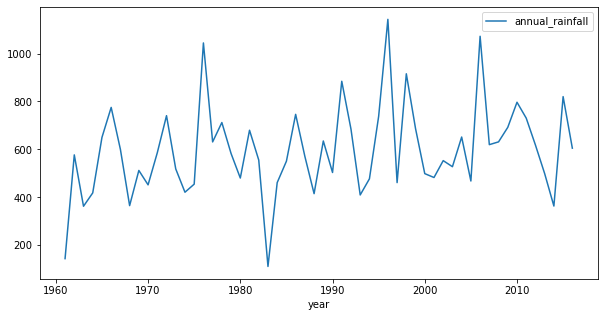

In [158]:
SP_data.plot.line(x="year", y="annual_rainfall", figsize=(10,5))

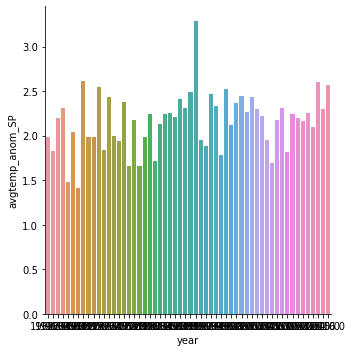

In [159]:
# Visualisations exploratoire 
sns.catplot(x="year", y="avgtemp_anom_SP", data = SP_data, kind="bar")

In [160]:
### I decided to do the visualizations in tableau
##We export the two new data frames
temptable.to_csv("temptable.csv")

In [161]:
#export the annual table respecting to SP
annual_table_SP.to_csv("annual_table_SP.csv")

Conclusions:
    the anomalies temperatures of SP were significantly bigger in the period of the drought in comparison with Rio and Manaus. Check comparative powerpoint file.

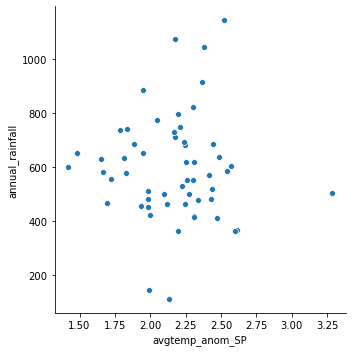

In [162]:
##avgtemp_anom_SP and annualrainfall
sns.relplot(x="avgtemp_anom_SP", y="annual_rainfall", data=SP_data);

No big graphical evidences of correlation! To be explained in the presentation and in the deliveravle

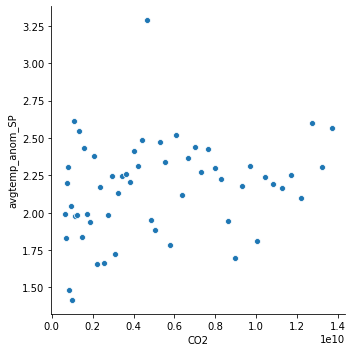

In [163]:
sns.relplot(x="CO2", y="avgtemp_anom_SP", data=SP_data);

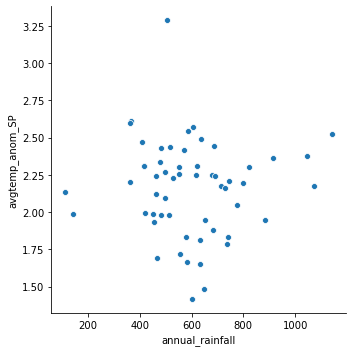

In [164]:
##avgtemp_anom_SP and annualrainfall
sns.relplot(x="annual_rainfall", y="avgtemp_anom_SP", data=SP_data);

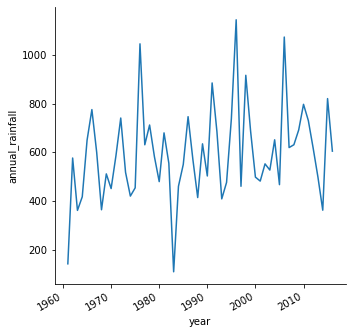

In [165]:
 g= sns.relplot(x="year", y="annual_rainfall", kind="line", data=SP_data)
g.fig.autofmt_xdate()

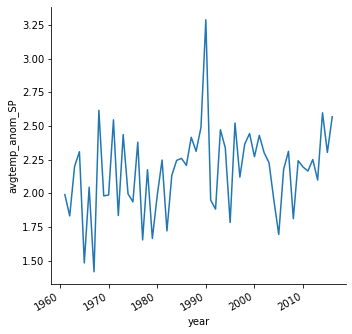

In [166]:
g= sns.relplot(x="year", y="avgtemp_anom_SP", kind="line", data=SP_data)
g.fig.autofmt_xdate()

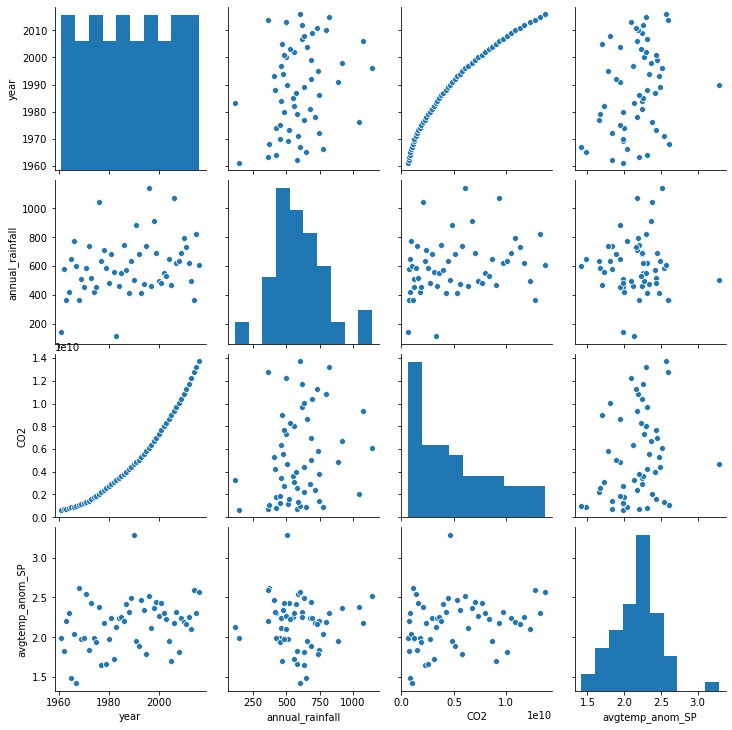

In [167]:
##plots of all possible permutations of parameters
sns.pairplot(SP_data)

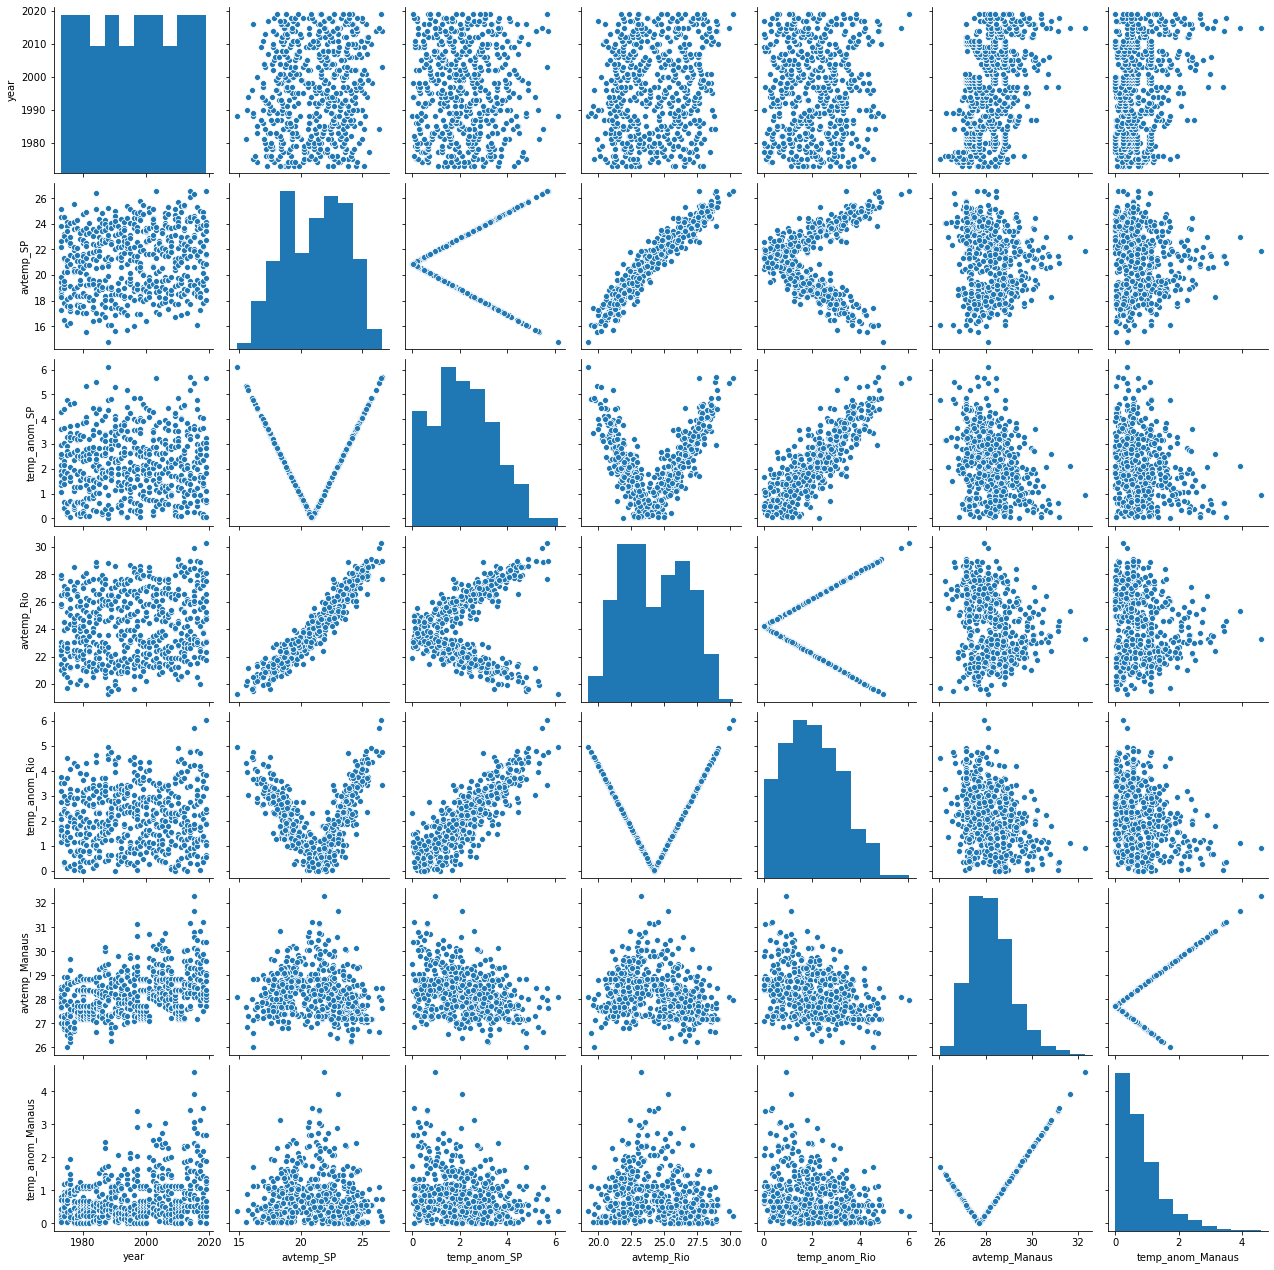

In [168]:
##focus specially on the clouds of points between the average temperature anomalies 
##which suggests some relation between these variables.
sns.pairplot(temptable)

/opt/conda/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:894: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


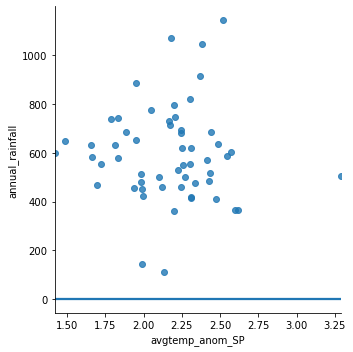

In [169]:
#Not meaninful
sns.lmplot(x="avgtemp_anom_SP", y="annual_rainfall", data=SP_data, logistic=True)
## a simple logistic regression curve

/opt/conda/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:894: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


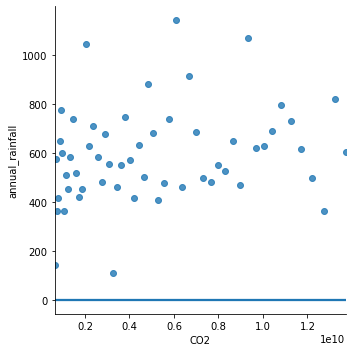

In [170]:
sns.lmplot(x="CO2", y="annual_rainfall", data=SP_data, logistic=True)
## a simple logistic regression curve
##Not meaningful


In [171]:
## Determination of the independent variables and the target variable.

In [172]:
SP_data.head()

,year,annual_rainfall,CO2,avgtemp_anom_SP
0,1961.0,144.1,637413757.0,1.990417
1,1962.0,577.0,691045205.0,1.832083
2,1963.0,362.7,746596143.0,2.199167
3,1964.0,418.4,803262819.0,2.308333
4,1965.0,649.9,859592436.0,1.483333


In [173]:
SP_data.columns

Index(['year', 'annual_rainfall', 'CO2', 'avgtemp_anom_SP'], dtype='object')

In [174]:
##Separation of the variable target and the variables explicatives
# target varaible
y = SP_data["annual_rainfall"]

# The variables explicatives
# Drop => suppression de la colonne 'Purchased'
X = SP_data.drop(["year","annual_rainfall"], axis=1) 

In [175]:
X.head(2)

,CO2,avgtemp_anom_SP
0,637413757.0,1.990417
1,691045205.0,1.832083


In [176]:
y.head(2)

0    144.1
1    577.0
Name: annual_rainfall, dtype: float64

In [177]:
# Normalisation des données StandardScaler
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
X = sc_x.fit_transform(X)

In [178]:
print(X)

[[-1.20397062e+00 -5.47942020e-01]
 [-1.18992740e+00 -1.04475524e+00]
 [-1.17538157e+00  1.07066984e-01]
 [-1.16054359e+00  4.49606622e-01]
 [-1.14579386e+00 -2.13905172e+00]
 [-1.12898026e+00 -3.76672201e-01]
 [-1.11167758e+00 -2.34562142e+00]
 [-1.09144433e+00  1.41185538e+00]
 [-1.06941445e+00 -5.78012294e-01]
 [-1.04492380e+00 -5.57093842e-01]
 [-1.01812171e+00  1.19221164e+00]
 [-9.88267430e-01 -1.03560341e+00]
 [-9.53698529e-01  8.49672002e-01]
 [-9.16273481e-01 -5.33560585e-01]
 [-8.76861973e-01 -7.16597033e-01]
 [-8.36433344e-01  6.71865166e-01]
 [-7.93993663e-01 -1.60301640e+00]
 [-7.47926582e-01  3.12375979e-02]
 [-6.98920644e-01 -1.56902392e+00]
 [-6.50280435e-01 -5.72782681e-01]
 [-6.05643972e-01  2.56110948e-01]
 [-5.60923342e-01 -1.39383189e+00]
 [-5.17606835e-01 -9.95027222e-02]
 [-4.73719861e-01  2.48266529e-01]
 [-4.26604000e-01  2.95333044e-01]
 [-3.74960962e-01  1.33215048e-01]
 [-3.21075855e-01  7.86916648e-01]
 [-2.66726173e-01  4.60065848e-01]
 [-2.11184911e-01  1

In [179]:
# Division du dataset en train et un test set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

In [180]:
print("Number of lines of X_train = {}".format(len(X_train)))
print("Number of lines of  X_test = {}".format(len(X_test)))
print("Number of lines of  y_train = {}".format(len(y_train)))
print(" Number of lines of  = {}".format(len(y_test)))

Number of lines of X_train = 39
Number of lines of  X_test = 17
Number of lines of  y_train = 39
 Number of lines of  = 17


Comment: small data set, specially the stresstest dataset.

In [181]:
##Modelling with statsmodel

In [182]:
import statsmodels.api as sm

X_train2 = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train2)
results = model.fit()
# Avec  statsmodel, on a une sortie qui ressemble beaucoup à celle de R
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        annual_rainfall   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                 -0.026
Method:                 Least Squares   F-statistic:                    0.5129
Date:                Thu, 27 Aug 2020   Prob (F-statistic):              0.603
Time:                        23:11:06   Log-Likelihood:                -256.92
No. Observations:                  39   AIC:                             519.8
Df Residuals:                      36   BIC:                             524.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        580.6273     29.293     19.821      0.0

ATEENTION: Adj. R-squared:  value not coherent...
The test is not relevant here. The data is very sparse. Also the hypothesis of data being normally distributed just works good for big sets data thanks to the Central Limit theorem which is not evidently the case

In [183]:
## Conclusions about anomalies temperatures and annual rainfall SP.

In [184]:
##Using Spearman correlation
#gapminder.gdpPercap.corr(gapminder.lifeExp, method="spearman")

Spearman correlation coefficient is a good coefficient of correlation to estimate some 
statistical correlation between variables when we do not know the shape of the distributions
(no enough data to postulate Normality of the underlying distributions). It just supposes some
kind of monotonic dependence between the variables which is not the case here maybe due
to the seasonality of the rainfalls. BAD INDICATOR FOR US IN THIS CONTEXT!

In [187]:
SP_data.annual_rainfall.corr(SP_data.avgtemp_anom_SP, method="spearman")

-0.09046634427746485

Negative low correlation!! Strange conclusion.

In [189]:
SP_data_selected2=SP_data.drop(["year", "avgtemp_anom_SP"], axis=1)

In [190]:
SP_data_selected2.annual_rainfall.corr(SP_data_selected2.CO2, method="spearman")

0.2651401230348599

We find very low correlations between annual rainfall and CO2 emissions which would go against empirical evidence.

# Partie 4 : Modelization. <a name='P4'></a>


## 4.1 - Initial considerations about the anomalies of temperatures. <a name='P4-1'></a>

In [191]:
temptable.head()

,year,month,avtemp_SP,temp_anom_SP,avtemp_Rio,temp_anom_Rio,avtemp_Manaus,temp_anom_Manaus
0,1973,JAN,24.51,3.62,27.73,3.525,27.99,0.27
1,1973,FEB,25.18,4.29,27.97,3.765,27.64,0.08
2,1973,MAR,22.22,1.33,25.70,1.495,27.92,0.20
3,1973,APR,23.85,2.96,26.49,2.285,27.81,0.09
4,1973,MAY,18.73,2.16,22.42,1.785,26.99,0.73


In [192]:
temptable.temp_anom_Rio.corr(temptable.temp_anom_SP, method="spearman")

0.8482802069432448

##There is high correlation between the temperatures anomalies of SP and the temperature anomalies in Rio. 

In [193]:
##By graphical inspection in tableau we see a local maximum for 
##the anomaly temperature  for Rioin 2017.
#

In [194]:
threshold_Rio =2.379
#by inpsection on the tableau file avg_temp_SP

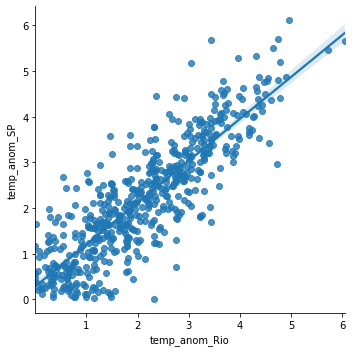

In [195]:
sns.lmplot(x="temp_anom_Rio", y="temp_anom_SP", data=temptable)
## strong correlation

## 4.2 -Multilinear regression. <a name='P4-2'></a>

In [196]:
# Separation of the explicative variables and the target variable 
X = temptable.drop(["year","month", "avtemp_Rio", "temp_anom_Rio"  ], axis=1)
y = temptable["temp_anom_Rio"]

In [197]:
X.head()

,avtemp_SP,temp_anom_SP,avtemp_Manaus,temp_anom_Manaus
0,24.51,3.62,27.99,0.27
1,25.18,4.29,27.64,0.08
2,22.22,1.33,27.92,0.20
3,23.85,2.96,27.81,0.09
4,18.73,2.16,26.99,0.73


In [198]:
y.head()

0    3.525
1    3.765
2    1.495
3    2.285
4    1.785
Name: temp_anom_Rio, dtype: float64

In [199]:
# Feature scaling----> Standardization
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
X = sc_x.fit_transform(X)

In [200]:
## Separation of the data set- training/test
# Train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0) 

In [201]:
print("Number of lines of X_train = {}".format(len(X_train)))
print("Number of lines of X_test = {}".format(len(X_test)))
print("Number of lines of y_train = {}".format(len(y_train)))
print("Number of lines of y_test = {}".format(len(y_test)))

Number of lines of X_train = 394
Number of lines of X_test = 170
Number of lines of y_train = 394
Number of lines of y_test = 170


In [202]:
# Création du modèle 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [203]:
##regression coefficients
regressor.coef_

array([-0.02153784,  1.0250486 ,  0.02971434, -0.05948205])

In [204]:
# Vérifcation de l'overfitting 
print(" Score de Train : {}\n Score de Test : {}".format(regressor.score(X_train, y_train), regressor.score(X_test, y_test)))

 Score de Train : 0.7363617287232707
 Score de Test : 0.7050952691196659


We have overfitting. Score takes respect to R^2. Due to the difference between the size of the training set and the test set. There is still a significant difference.

In [205]:
# Coefficients of regression 
feature_importance = pd.DataFrame({"features": ['avtemp_SP', 
                                                'temp_anom_SP', 
                                                'avtemp_Manaus', 
                                                'temp_anom_Manaus', 
                                            
                                                ], 
                                "values":regressor.coef_})

feature_importance.sort_values(["values"], ascending=False)

,features,values
1,temp_anom_SP,1.025049
2,avtemp_Manaus,0.029714
0,avtemp_SP,-0.021538
3,temp_anom_Manaus,-0.059482


## 4.3 -Logistic regression <a name='P4-3'></a>

In [206]:
####Logistic regression using scikit

In [209]:
threshold_Rio= 0.62
###FINAL DECISION FOR THE THRESHOLD FOR ANOMALY TEMPERATURES RIO
#The 2-degree increase in global average surface temperature 
#that has occurred since the pre-industrial era (1880-1900) might seem small,
#but it means a significant increase in accumulated heat.#
# check climate.gov

#GLOBAL anomaly of 2010, a threshold alarming warmest year

In [210]:
temptable.head()

,year,month,avtemp_SP,temp_anom_SP,avtemp_Rio,temp_anom_Rio,avtemp_Manaus,temp_anom_Manaus
0,1973,JAN,24.51,3.62,27.73,3.525,27.99,0.27
1,1973,FEB,25.18,4.29,27.97,3.765,27.64,0.08
2,1973,MAR,22.22,1.33,25.70,1.495,27.92,0.20
3,1973,APR,23.85,2.96,26.49,2.285,27.81,0.09
4,1973,MAY,18.73,2.16,22.42,1.785,26.99,0.73


Preparation of the binary variable:

In [211]:
temptable["bad_numbers"]=0
for i in range(len(temptable)):
    if temptable.loc[i, "temp_anom_Rio"] < threshold_Rio:
        temptable.loc[i, "bad_numbers"]=0
    else:
        temptable.loc[i, "bad_numbers"]=1
temptable.head(100)

,year,month,avtemp_SP,temp_anom_SP,avtemp_Rio,temp_anom_Rio,avtemp_Manaus,temp_anom_Manaus,bad_numbers
0,1973,JAN,24.51,3.62,27.73,3.525,27.990,0.270,1
1,1973,FEB,25.18,4.29,27.97,3.765,27.640,0.080,1
2,1973,MAR,22.22,1.33,25.70,1.495,27.920,0.200,1
3,1973,APR,23.85,2.96,26.49,2.285,27.810,0.090,1
4,1973,MAY,18.73,2.16,22.42,1.785,26.990,0.730,1
...,...,...,...,...,...,...,...,...,...
95,1980,DEC,22.74,1.85,27.01,2.805,27.720,0.000,1
96,1981,JAN,23.67,2.78,27.42,3.215,27.160,0.560,1
97,1981,FEB,24.97,4.08,28.06,3.855,27.160,0.560,1
98,1981,MAR,23.23,2.34,26.26,2.055,27.215,0.505,1


In [212]:
###New variables target and explicative variables


In [213]:
# Separation of the explicative variables and the target variable 
# X = dataset.iloc[:, :-1]
# y = dataset.iloc[:, -1]
X = temptable.drop(["year","month", "avtemp_Rio", "temp_anom_Rio", "bad_numbers"  ], axis=1)
y = temptable["bad_numbers"]

In [214]:
# Feature scaling----> Standardization
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
X = sc_x.fit_transform(X)

In [215]:
## Separation of the data set- training/test
# Train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0) 

In [216]:
print("Number of lines of  X_train = {}".format(len(X_train)))
print("Number of lines of X_test = {}".format(len(X_test)))
print("Number of lines of y_train = {}".format(len(y_train)))
print("Number of lines of y_test = {}".format(len(y_test)))

Number of lines of  X_train = 394
Number of lines of X_test = 170
Number of lines of y_train = 394
Number of lines of y_test = 170


In [217]:
# THE LOGISTIC MODEL 
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [218]:
# Evaluation du modèle 
print("Train score : {}".format(classifier.score(X_train, y_train)))
print("Test score : {}".format(classifier.score(X_test, y_test)))

Train score : 0.8629441624365483
Test score : 0.8705882352941177


In [219]:
##The R^2 model is high and we can see no overfitting/underfitting. The error difference
#can be considered neglegible


In [220]:
coefs = classifier.coef_
coefs

array([[-1.21972331,  2.25736008,  0.01612904, -0.27531315]])

In [221]:
# Coefficients of the logistic regression 
feature_importance = pd.DataFrame({"features": ['avtemp_SP', 
                                                'temp_anom_SP', 
                                                'avtemp_Manaus', 
                                                'temp_anom_Manaus', 
                                            
                                                ], 
                                "values": classifier.coef_.squeeze()})

feature_importance.sort_values(["values"], ascending=False)

,features,values
1,temp_anom_SP,2.257360
2,avtemp_Manaus,0.016129
3,temp_anom_Manaus,-0.275313
0,avtemp_SP,-1.219723


In [222]:
####PREDICTION

In [223]:
# Calculus of probabilities for each mass of the test sample
y_pred_prob = classifier.predict_proba(X_test)
y_pred_prob[:5]

array([[0.16085699, 0.83914301],
       [0.00855615, 0.99144385],
       [0.64050984, 0.35949016],
       [0.00988722, 0.99011278],
       [0.00735367, 0.99264633]])

In [224]:
# Identifier for each mass temperature of the test sample
y_test_pred = classifier.predict(X_test)
print(y_test_pred)

[1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [225]:
#Notorious it is more probable that the anomaly 
#temperatures in Rio surpasses the threshold fixed 
threshold_Rio

0.62

In [226]:
y_train_pred=classifier.predict(X_train)
y_train_pred[:15]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [227]:
# Matrice de confusion 
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)
cm

array([[  2,  16],
       [  6, 146]])

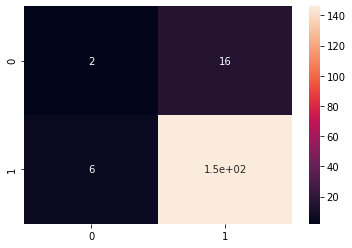

In [228]:
# Visualisation via Seaborn 
sns.heatmap(cm, annot=True)

Comment: huge proportion of true negatives in comparison with false negatives. GOOD OUTCOME.
    

In [229]:
TN=146
FN=16
TP=2
FP=6

In [230]:
Accuracy =  (TN+TP) / (TP+FN+TN+FP)
Accuracy

0.8705882352941177

In [231]:
print("The accuracy of the model is", Accuracy)

The accuracy of the model is 0.8705882352941177


In [232]:
Precision=TP/(TP+FN)

In [233]:
print("The precision of the model is", 1- Precision)

The precision of the model is 0.8888888888888888


In [234]:
##Matrix confusion used in Bayesian statistics